In [2]:
import math

In [3]:
# first feature
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']

In [4]:
# second feature
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

In [5]:
# result or label column
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [6]:
# converting string type first feature to numeric first feautre

weather_dict = dict()
counter = 0

for i in weather:
    if  i not in weather_dict:
        weather_dict[i] = counter
        counter = counter + 1

print(weather_dict)

for i in range(len(weather)):
    weather[i] = weather_dict[weather[i]]

print(weather)

{'Sunny': 0, 'Overcast': 1, 'Rainy': 2}
[0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2]


In [7]:
# converting string type second feature to numeric second feautre

temp_dict = dict()
counter = 0

for i in temp:
    if  i not in temp_dict:
        temp_dict[i] = counter
        counter = counter + 1

print(temp_dict)

for i in range(len(temp)):
    temp[i] = temp_dict[temp[i]]

print(temp)

{'Hot': 0, 'Mild': 1, 'Cool': 2}
[0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1]


In [8]:
# converting string type label column to numeric label column

play_dict = dict()
final_dict = dict() # it's for later use when counting the number of classes
counter = 0

for i in play:
    if  i not in play_dict:
        play_dict[i] = counter
        final_dict[counter] = 0
        counter = counter + 1

print(play_dict)

for i in range(len(play)):
    play[i] = play_dict[play[i]]

print(play)
print(final_dict)

{'No': 0, 'Yes': 1}
[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]
{0: 0, 1: 0}


In [9]:
# combining weather and temp features into one column

features = list()

for i in range(len(weather)):
    features.append((weather[i],temp[i]))

features

[(0, 0),
 (0, 0),
 (1, 0),
 (2, 1),
 (2, 2),
 (2, 2),
 (1, 2),
 (0, 1),
 (0, 2),
 (2, 1),
 (0, 1),
 (1, 1),
 (1, 0),
 (2, 1)]

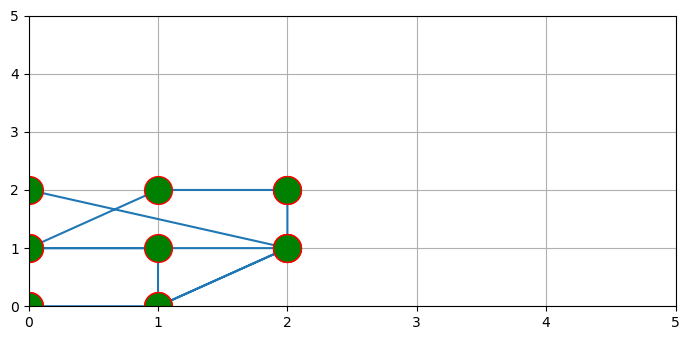

In [10]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
x = weather
y = temp
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.grid()
plt.plot(x, y, marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")
plt.show()

In [75]:
total_points = len(features)
k = math.floor(math.sqrt(total_points))

if k%2==0 :
    k = k + 1

print(k)

3


In [76]:
# entering an unknown data set or coordinate

print(weather_dict)
print(temp_dict)
str = input('Enter a coordinate : ')
l = str.split(',')
data = (int(l[0]),int(l[1]))
print(data)

{'Sunny': 0, 'Overcast': 1, 'Rainy': 2}
{'Hot': 0, 'Mild': 1, 'Cool': 2}
(1, 1)


In [77]:
# calculating distance from the given point to all points

distance_list = list()
final_distance_list = list()

for i in features:
    distance_list.append(math.sqrt((data[0]-i[0])**2 + (data[1]-i[1])**2))

for i in range(len(play)):
    final_distance_list.append((play[i],distance_list[i]))


final_distance_list

[(0, 1.4142135623730951),
 (0, 1.4142135623730951),
 (1, 1.0),
 (1, 1.0),
 (1, 1.4142135623730951),
 (0, 1.4142135623730951),
 (1, 1.0),
 (0, 1.0),
 (1, 1.4142135623730951),
 (1, 1.0),
 (1, 1.0),
 (1, 0.0),
 (1, 1.0),
 (0, 1.0)]

In [78]:
# sorting the distance in ascending order

def Sort_Tuple(tup): 
       
    # getting length of list of tuples
    lst = len(tup) 
    for i in range(0, lst): 
           
        for j in range(0, lst-i-1): 
            if (tup[j][-1] > tup[j + 1][-1]): 
                temp = tup[j] 
                tup[j]= tup[j + 1] 
                tup[j + 1]= temp 
    return tup 
   
# Driver Code 
sorted_distance_list = Sort_Tuple(final_distance_list)
         
sorted_distance_list

[(1, 0.0),
 (1, 1.0),
 (1, 1.0),
 (1, 1.0),
 (0, 1.0),
 (1, 1.0),
 (1, 1.0),
 (1, 1.0),
 (0, 1.0),
 (0, 1.4142135623730951),
 (0, 1.4142135623730951),
 (1, 1.4142135623730951),
 (0, 1.4142135623730951),
 (1, 1.4142135623730951)]

In [79]:
# defining which class the givent point belongs to

counter = 0

for i in sorted_distance_list:
    final_dict[i[0]] = final_dict[i[0]] + 1
    counter = counter + 1
    if counter == k :
        break

max_value = max(final_dict, key=final_dict.get)
print('The point belongs to',max_value,'class')

The point belongs to 1 class
